# Pearson Correlation

## Feature selection using correlation method
### Breast cancer dataset

* https://towardsdatascience.com/feature-selection-correlation-and-p-value-da8921bfb3cf

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns = cancer_data.feature_names)
df['diagnosis'] = cancer_data.target

X = df.drop('diagnosis', 1)
y = df['diagnosis']
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [ ]:
# print label
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [ ]:
cancer_data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

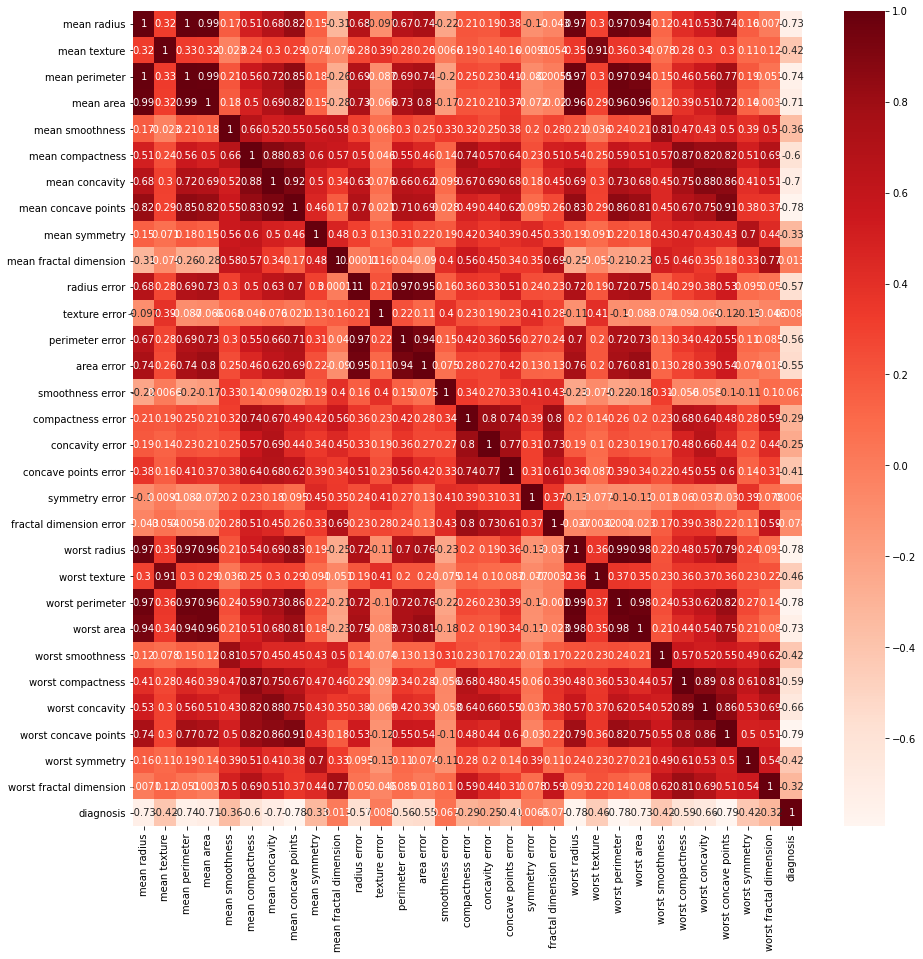

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,15))
cor = df.corr(method ='pearson')
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor['diagnosis']) #Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5].sort_values(ascending=False)
relevant_features[1:-1]

worst concave points    0.793566
worst perimeter         0.782914
mean concave points     0.776614
worst radius            0.776454
mean perimeter          0.742636
worst area              0.733825
mean radius             0.730029
mean area               0.708984
mean concavity          0.696360
worst concavity         0.659610
mean compactness        0.596534
worst compactness       0.590998
radius error            0.567134
perimeter error         0.556141
Name: diagnosis, dtype: float64

In [ ]:
# select correlation data
cor_data = pd.DataFrame()

for i in range(1, relevant_features.index[1:-1].shape[0]+1):  
  tmp_data = df[relevant_features.index[i:i+1][0]]
  column_name = relevant_features.index[i:i+1][0]
  cor_data[column_name] = tmp_data

cor_data  

,worst concave points,worst perimeter,mean concave points,worst radius,mean perimeter,worst area,mean radius,mean area,mean concavity,worst concavity,mean compactness,worst compactness,radius error,perimeter error
0,0.2654,184.60,0.14710,25.380,122.80,2019.0,17.99,1001.0,0.30010,0.7119,0.27760,0.66560,1.0950,8.589
1,0.1860,158.80,0.07017,24.990,132.90,1956.0,20.57,1326.0,0.08690,0.2416,0.07864,0.18660,0.5435,3.398
2,0.2430,152.50,0.12790,23.570,130.00,1709.0,19.69,1203.0,0.19740,0.4504,0.15990,0.42450,0.7456,4.585
3,0.2575,98.87,0.10520,14.910,77.58,567.7,11.42,386.1,0.24140,0.6869,0.28390,0.86630,0.4956,3.445
4,0.1625,152.20,0.10430,22.540,135.10,1575.0,20.29,1297.0,0.19800,0.4000,0.13280,0.20500,0.7572,5.438
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.2216,166.10,0.13890,25.450,142.00,2027.0,21.56,1479.0,0.24390,0.4107,0.11590,0.21130,1.1760,7.673
565,0.1628,155.00,0.09791,23.690,131.20,1731.0,20.13,1261.0,0.14400,0.3215,0.10340,0.19220,0.7655,5.203
566,0.1418,126.70,0.05302,18.980,108.30,1124.0,16.60,858.1,0.09251,0.3403,0.10230,0.30940,0.4564,3.425
567,0.2650,184.60,0.15200,25.740,140.10,1821.0,20.60,1265.0,0.35140,0.9387,0.27700,0.86810,0.7260,5.772


### Normalization progress

In [ ]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(cor_data)
cor_data_norm = transformer.transform(cor_data)

cor_data_norm = pd.DataFrame(data=cor_data_norm, columns=cor_data.columns)
cor_data_norm

,worst concave points,worst perimeter,mean concave points,worst radius,mean perimeter,worst area,mean radius,mean area,mean concavity,worst concavity,mean compactness,worst compactness,radius error,perimeter error
0,0.000117,0.081514,0.000065,0.011207,0.054225,0.891535,0.007944,0.442014,0.000133,0.000314,0.000123,0.000294,0.000484,0.003793
1,0.000078,0.066937,0.000030,0.010534,0.056020,0.824491,0.008671,0.558934,0.000037,0.000102,0.000033,0.000079,0.000229,0.001432
2,0.000116,0.072627,0.000061,0.011225,0.061912,0.813901,0.009377,0.572921,0.000094,0.000215,0.000076,0.000202,0.000355,0.002184
3,0.000369,0.141602,0.000151,0.021354,0.111110,0.813063,0.016356,0.552974,0.000346,0.000984,0.000407,0.001241,0.000710,0.004934
4,0.000079,0.074220,0.000051,0.010992,0.065881,0.768046,0.009894,0.632480,0.000097,0.000195,0.000065,0.000100,0.000369,0.002652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.000088,0.065940,0.000055,0.010103,0.056373,0.804701,0.008559,0.587150,0.000097,0.000163,0.000046,0.000084,0.000467,0.003046
565,0.000076,0.072045,0.000046,0.011011,0.060982,0.804576,0.009357,0.586118,0.000067,0.000149,0.000048,0.000089,0.000356,0.002418
566,0.000100,0.088967,0.000037,0.013327,0.076047,0.789255,0.011656,0.602544,0.000065,0.000239,0.000072,0.000217,0.000320,0.002405
567,0.000119,0.082795,0.000068,0.011545,0.062837,0.816740,0.009239,0.567368,0.000158,0.000421,0.000124,0.000389,0.000326,0.002589


### Dividing data into training and test set

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(cor_data_norm, y, 
                                                    test_size=0.2, random_state=75)

print('x_train shape is: ', x_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape)
print('y_test shape is: ', y_test.shape)

x_train shape is:  (455, 14)
y_train shape is:  (455,)
x_test shape is:  (114, 14)
y_test shape is:  (114,)


### K-Nearest Neighbor (KNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train, y_train)

y_pred = clf.predict(x_test)
accuracy_score(y_test, y_pred)

0.9385964912280702

## without feature selection

In [ ]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
from sklearn.preprocessing import Normalizer

transformer = Normalizer().fit(X)
X_norm = transformer.transform(X)

X_data_norm = pd.DataFrame(data=X_norm, columns=X.columns)
X_data_norm

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.007925,0.004573,0.054099,0.440986,0.000052,0.000122,0.000132,0.000065,0.000107,0.000035,0.000482,0.000399,0.003784,0.067580,0.000003,0.000022,0.000024,0.000007,0.000013,0.000003,0.011181,0.007635,0.081325,0.889462,0.000071,0.000293,0.000314,0.000117,0.000203,0.000052
1,0.008666,0.007486,0.055988,0.558619,0.000036,0.000033,0.000037,0.000030,0.000076,0.000024,0.000229,0.000309,0.001432,0.031209,0.000002,0.000006,0.000008,0.000006,0.000006,0.000001,0.010528,0.009862,0.066899,0.824026,0.000052,0.000079,0.000102,0.000078,0.000116,0.000038
2,0.009367,0.010109,0.061842,0.572276,0.000052,0.000076,0.000094,0.000061,0.000098,0.000029,0.000355,0.000374,0.002181,0.044731,0.000003,0.000019,0.000018,0.000010,0.000011,0.000002,0.011212,0.012145,0.072545,0.812984,0.000069,0.000202,0.000214,0.000116,0.000172,0.000042
3,0.016325,0.029133,0.110899,0.551922,0.000204,0.000406,0.000345,0.000150,0.000371,0.000139,0.000708,0.001652,0.004925,0.038925,0.000013,0.000107,0.000081,0.000027,0.000085,0.000013,0.021314,0.037881,0.141333,0.811515,0.000300,0.001238,0.000982,0.000368,0.000949,0.000247
4,0.009883,0.006985,0.065808,0.631774,0.000049,0.000065,0.000096,0.000051,0.000088,0.000029,0.000369,0.000381,0.002649,0.046002,0.000006,0.000012,0.000028,0.000009,0.000009,0.000002,0.010979,0.008120,0.074137,0.767189,0.000067,0.000100,0.000195,0.000079,0.000115,0.000037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.008541,0.008870,0.056256,0.585933,0.000044,0.000046,0.000097,0.000055,0.000068,0.000022,0.000466,0.000498,0.003040,0.062872,0.000004,0.000011,0.000021,0.000010,0.000004,0.000002,0.010082,0.010459,0.065804,0.803033,0.000056,0.000084,0.000163,0.000088,0.000082,0.000028
565,0.009344,0.013114,0.060903,0.585355,0.000045,0.000048,0.000067,0.000045,0.000081,0.000026,0.000355,0.001143,0.002415,0.045974,0.000003,0.000011,0.000018,0.000008,0.000009,0.000001,0.010997,0.017756,0.071951,0.803528,0.000054,0.000089,0.000149,0.000076,0.000119,0.000031
566,0.011644,0.019696,0.075966,0.601905,0.000059,0.000072,0.000065,0.000037,0.000112,0.000040,0.000320,0.000754,0.002402,0.034055,0.000004,0.000026,0.000033,0.000011,0.000009,0.000003,0.013313,0.023933,0.088872,0.788417,0.000080,0.000217,0.000239,0.000099,0.000156,0.000055
567,0.009230,0.013142,0.062774,0.566806,0.000053,0.000124,0.000157,0.000068,0.000107,0.000031,0.000325,0.000715,0.002586,0.038632,0.000003,0.000028,0.000032,0.000007,0.000010,0.000003,0.011533,0.017663,0.082713,0.815932,0.000074,0.000389,0.000421,0.000119,0.000183,0.000056


In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_data_norm, y, test_size=0.2, random_state=75)

print('x_train shape is: ', x_train.shape)
print('y_train shape is: ', y_train.shape)
print('x_test shape is: ', x_test.shape)
print('y_test shape is: ', y_test.shape)

x_train shape is:  (455, 30)
y_train shape is:  (455,)
x_test shape is:  (114, 30)
y_test shape is:  (114,)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

clf = KNeighborsClassifier(n_neighbors=7)
clf.fit(x_train, y_train)

y_pred_without_fs = clf.predict(x_test)
accuracy_score(y_test, y_pred_without_fs)

0.9473684210526315

# Recursive Feature Elimination (RFE)

Reference  
Guyon, I., Weston, J., Barnhill, S., & Vapnik, V., “Gene selection for cancer classification using support vector machines”, Mach. Learn., 46(1-3), 389–422, 2002.

## RFE - SVM

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

X, y = make_friedman1(n_features=10, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=75)

svm_clf = SVR(kernel="linear")
rfe_selector = RFE(svm_clf, n_features_to_select=5, step=1)
rfe_selector.fit(x_train, y_train)

print(selector.support_)
print(selector.ranking_)

[ True  True False  True  True False False  True False False]
[1 1 6 1 1 5 3 1 4 2]


In [ ]:
# create RFE data
x_train_rfe = rfe_selector.transform(x_train)
x_test_rfe = rfe_selector.transform(x_test)

print(x_train_rfe.shape)
print(x_test_rfe.shape)

(80, 5)
(20, 5)


## RFE - Linear

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X, y = make_friedman1(n_features=10, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=75)

lr_clf = LinearRegression() #Initializing RFE model
rfe_selector = RFE(lr_clf, n_features_to_select=5, step=1)
rfe_selector.fit(x_train, y_train)

print(selector.support_)
print(selector.ranking_)

[ True  True False  True  True False False  True False False]
[1 1 6 1 1 5 3 1 4 2]


In [ ]:
# create RFE data
x_train_rfe = rfe_selector.transform(x_train)
x_test_rfe = rfe_selector.transform(x_test)

print(x_train_rfe.shape)
print(x_test_rfe.shape)

(80, 5)
(20, 5)


# Principal Component Analysis (PCA)

Read more
* https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html

In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

X, y = make_friedman1(n_features=10, random_state=0)
x_train, x_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=75)

pca_clf = PCA()
x_train_pca = pca_clf.fit_transform(x_train)
x_test_pca = pca_clf.fit_transform(x_test)

print(x_train_pca.shape)
print(x_test_pca.shape)


(80, 10)
(20, 10)


In [ ]:
print(x_train[0])
print(x_train_pca[0])

[0.86385561 0.11753186 0.51737911 0.13206811 0.71685968 0.3960597
 0.56542131 0.18327984 0.14484776 0.48805628]
[-0.53920864 -0.21534482 -0.3465056  -0.20667164  0.05223516 -0.08325658
  0.11006185  0.18758579 -0.31364582 -0.10428217]


In [ ]:
var_ratio = pca_clf.explained_variance_ratio_
print("Explained variance ratio:",var_ratio, sep='\n')

Explained variance ratio:
[0.24648355 0.1869188  0.15737862 0.11449547 0.09005619 0.072385
 0.05078349 0.03626017 0.02507092 0.02016778]


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_pca_cumulative_variance(var_ratio):
  cum_var_ratio = np.cumsum(var_ratio)
  plt.figure(figsize=(10, 5))
  plt.bar(range(len(var_ratio)), 
          var_ratio, 
          alpha=0.3333, 
          align='center', 
          label='individual explained variance', 
          color = 'g')
  plt.step(range(len(cum_var_ratio)),
           cum_var_ratio, 
           where='mid',
           label='cumulative explained variance')
  plt.ylabel('Explained variance ratio')
  plt.xlabel('Principal components')
  plt.legend(loc='best')
  plt.show()

  print("Explained variance ratio:",var_ratio, sep='\n')
  print("Cumulative explained ratio:",cum_var_ratio, sep='\n')

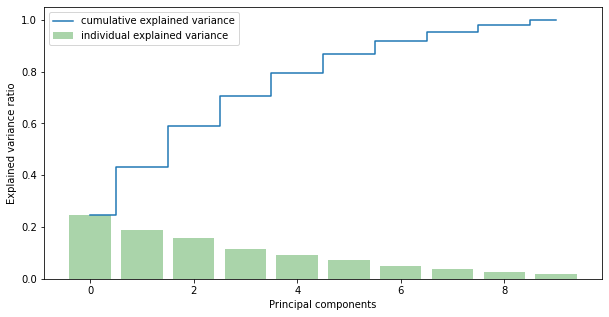

Explained variance ratio:
[0.24648355 0.1869188  0.15737862 0.11449547 0.09005619 0.072385
 0.05078349 0.03626017 0.02507092 0.02016778]
Cumulative explained ratio:
[0.24648355 0.43340235 0.59078097 0.70527644 0.79533262 0.86771763
 0.91850112 0.95476129 0.97983222 1.        ]


In [ ]:
plot_pca_cumulative_variance(var_ratio)

## Iris dataset

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data
y = iris.target

pca_clf = PCA()
x_pca = pca_clf.fit_transform(X)

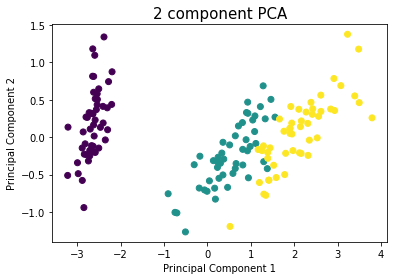

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(x_pca[:,0], x_pca[:,1], c=iris.target)
plt.title('2 component PCA', fontsize = 15)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

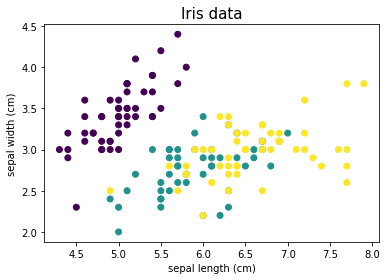

In [ ]:
import matplotlib.pyplot as plt

fe = [0,1]
plt.scatter(X[:,fe[0]], X[:,fe[1]], c=iris.target)
plt.title('Iris data', fontsize = 15)
plt.xlabel(iris.feature_names[fe[0]])
plt.ylabel(iris.feature_names[fe[1]])
plt.show()

## MNIST dataset

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)

print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


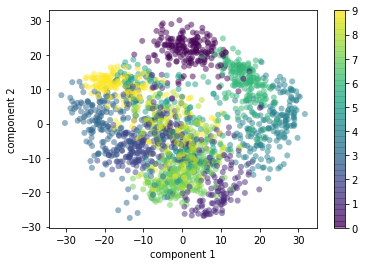

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5)
            #cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

### choosing the number of components

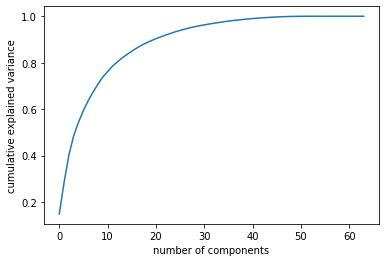

In [ ]:
pca = PCA().fit(digits.data)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');